In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
len(set(y_train))
#there are total 10 labels in the dataset.. 0 to 9

10

5


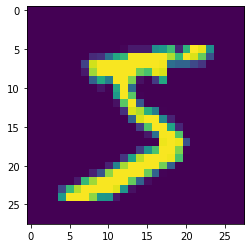

In [5]:
# for eg, the image present in the 0th index of the x_train is an image of digit '5', and its label is also mentioned as 
# - 5 in the y_train[0]
plt.imshow(x_train[0])
print(y_train[0])

In [6]:
#normalisation
x_train = x_train/255.0
y_train = y_train/255.0

In [9]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy')>0.99:
            
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True
            

In [13]:
# building the model

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])



In [14]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#object of MyCallback
callbacks = MyCallback()

#fitting the model
model.fit(x_train,y_train, epochs=10,validation_data=(x_test,y_test) ,callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0030 - accuracy: 0.0987 - val_loss: 11907.0381 - val_accuracy: 0.0980
Epoch 2/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0000e+00 - accuracy: 0.0987 - val_loss: 11907.0381 - val_accuracy: 0.0980
Epoch 3/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0000e+00 - accuracy: 0.0987 - val_loss: 11907.0381 - val_accuracy: 0.0980
Epoch 4/10
 592/1875 [========>.....................] - ETA: 38s - loss: 0.0000e+00 - accuracy: 0.0977

KeyboardInterrupt: 